In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.diagnostic import normal_ad
from statsmodels.graphics.gofplots import qqplot

pd.set_option('display.max_colwidth', None)  
pd.set_option('display.max_rows', None)   
pd.set_option('display.max_columns', None)

# Load the training data and calories data
df_train = pd.read_csv('playground-series-s5e5/train.csv')
df_calories = pd.read_csv('playground-series-s5e5/calories.csv')
df_train = pd.concat([df_train, df_calories], axis=0)

## Exploratory Data Analysis

In [2]:
df_train.head()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,User_ID,Gender
0,0.0,male,36,189.0,82.0,26.0,101.0,41.0,150.0,NaN,NaN
1,1.0,female,64,163.0,60.0,8.0,85.0,39.7,34.0,NaN,NaN
2,2.0,female,51,161.0,64.0,7.0,84.0,39.8,29.0,NaN,NaN
3,3.0,male,20,192.0,90.0,25.0,105.0,40.7,140.0,NaN,NaN
4,4.0,female,38,166.0,61.0,25.0,102.0,40.6,146.0,NaN,NaN


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 765000 entries, 0 to 14999
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          750000 non-null  float64
 1   Sex         750000 non-null  object 
 2   Age         765000 non-null  int64  
 3   Height      765000 non-null  float64
 4   Weight      765000 non-null  float64
 5   Duration    765000 non-null  float64
 6   Heart_Rate  765000 non-null  float64
 7   Body_Temp   765000 non-null  float64
 8   Calories    765000 non-null  float64
 9   User_ID     15000 non-null   float64
 10  Gender      15000 non-null   object 
dtypes: float64(8), int64(1), object(2)
memory usage: 70.0+ MB


In [4]:
print(f"train_shape : {df_train.shape}")
df_train.describe()

train_shape : (765000, 11)


,id,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,User_ID
count,750000.000000,765000.000000,765000.000000,765000.000000,765000.000000,765000.000000,765000.000000,765000.000000,1.500000e+04
mean,374999.500000,41.447255,174.693126,75.142162,15.423163,95.484672,40.036041,88.307424,1.497736e+07
std,216506.495284,15.213677,12.854173,14.004122,8.353421,9.452476,0.779863,62.396760,2.872851e+06
min,0.000000,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000,1.000116e+07
25%,187499.750000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,34.000000,1.247419e+07
50%,374999.500000,40.000000,174.000000,74.000000,15.000000,95.000000,40.300000,77.000000,1.499728e+07
75%,562499.250000,52.000000,185.000000,87.000000,23.000000,103.000000,40.700000,136.000000,1.744928e+07
max,749999.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000,1.999965e+07


## Data Visualization

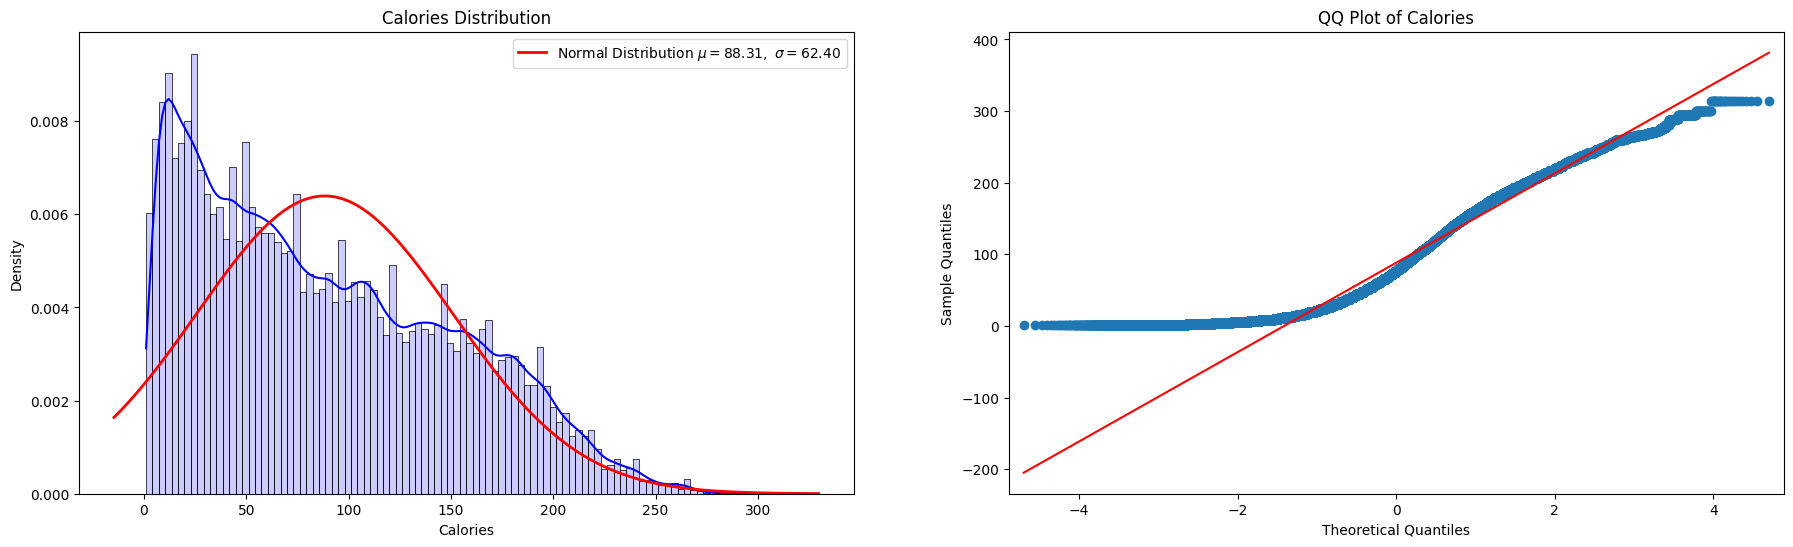

Skewness: 0.54
Kurtosis: -0.69
Anderson-Darling test statistic: 12623.1363
Anderson-Darling test p-value: 0.0000


In [5]:
# Calories Distribution Visualization
(mu, sigma) = norm.fit(df_train['Calories'])
fig, ax = plt.subplots(1, 2, figsize=(22,6))
sns.histplot(df_train['Calories'], bins=100, kde=True, stat='density', color='blue', alpha=0.2, ax=ax[0])
xmin, xmax = ax[0].get_xlim()
x = np.linspace(xmin, xmax, 100)
p= norm.pdf(x, mu, sigma)
ax[0].plot(x, p, 'r', linewidth=2, label=fr'Normal Distribution $\mu = {mu:.2f},\ \sigma = {sigma:.2f}$')
ax[0].legend(loc='upper right')
ax[0].set_title('Calories Distribution')      
ax[0].set_xlabel('Calories')
qqplot(df_train['Calories'], line='s', ax=ax[1])
ax[1].set_title('QQ Plot of Calories')
plt.show()

# Shapiro, Skewness and Kurtosis
skewness = df_train['Calories'].skew()
kurtosis = df_train['Calories'].kurtosis()
stat, p = normal_ad(df_train['Calories'])
print(f'Skewness: {skewness:.2f}')
print(f'Kurtosis: {kurtosis:.2f}')
print(f'Anderson-Darling test statistic: {stat:.4f}')
print(f'Anderson-Darling test p-value: {p:.4f}')

### Distribution of Target Variable (`Calories`)

Analysis of distribution of `Calories` variable using visualizations and statistical tests:

- **Skewness:** 0.54 (indicates a moderate right skew)  
- **Kurtosis:** -0.69 (lighter tails than a normal distribution)  
- **Anderson-Darling test p-value:** 0.0000 (strong evidence that data is not normally distributed)


The `Calories` values exhibit a moderate right skew and are not normally distributed.
To reduce skewness and stabilize variance, applied a **logarithmic transformation** to the target variable before modeling. This is a common preprocessing step to improve model accuracy and reliability.

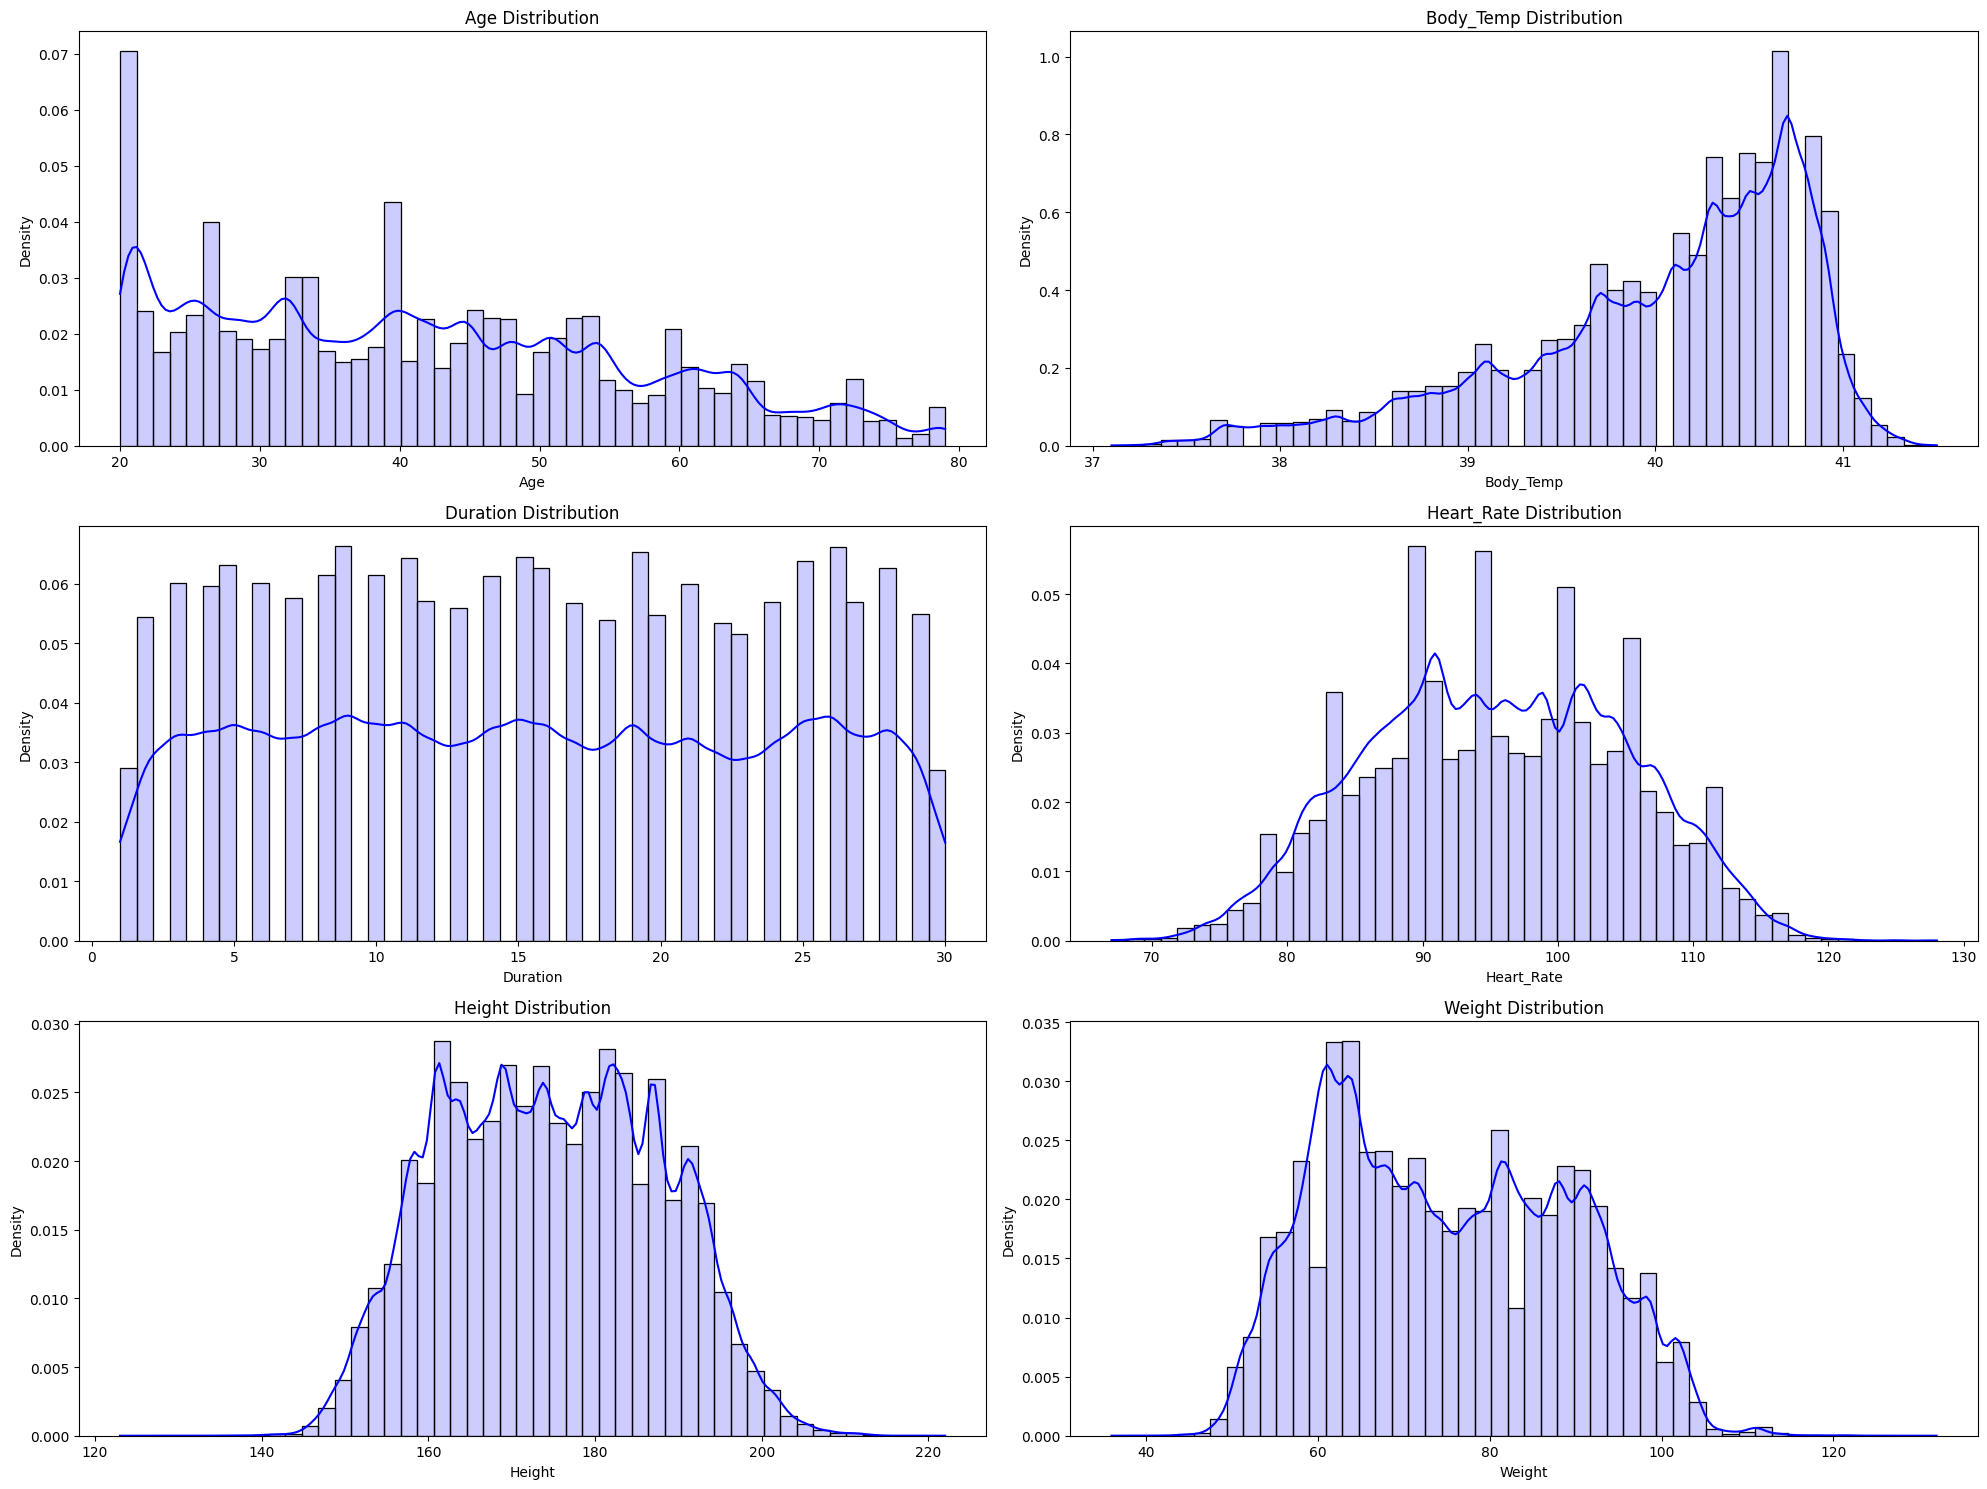

In [6]:
# Define columns to exclude from numeric feature list
exclude_cols = ['id', 'Calories', 'Sex', 'User_ID',	'Gender']

# Get list of numeric feature columns for visualization
numeric_cols = df_train.columns.difference(exclude_cols).tolist()

# Create subplots for visualizing distributions
fig, ax = plt.subplots(3, 2, figsize=(20, 15))
ax = ax.flatten()

# Plot distribution of each numeric feature
for i, col in enumerate(numeric_cols):
    sns.histplot(df_train[col], bins=50, kde=True, stat='density',
                 color='blue', alpha=0.2, ax=ax[i])
    ax[i].set_title(f'{col} Distribution')

plt.tight_layout()
plt.show()

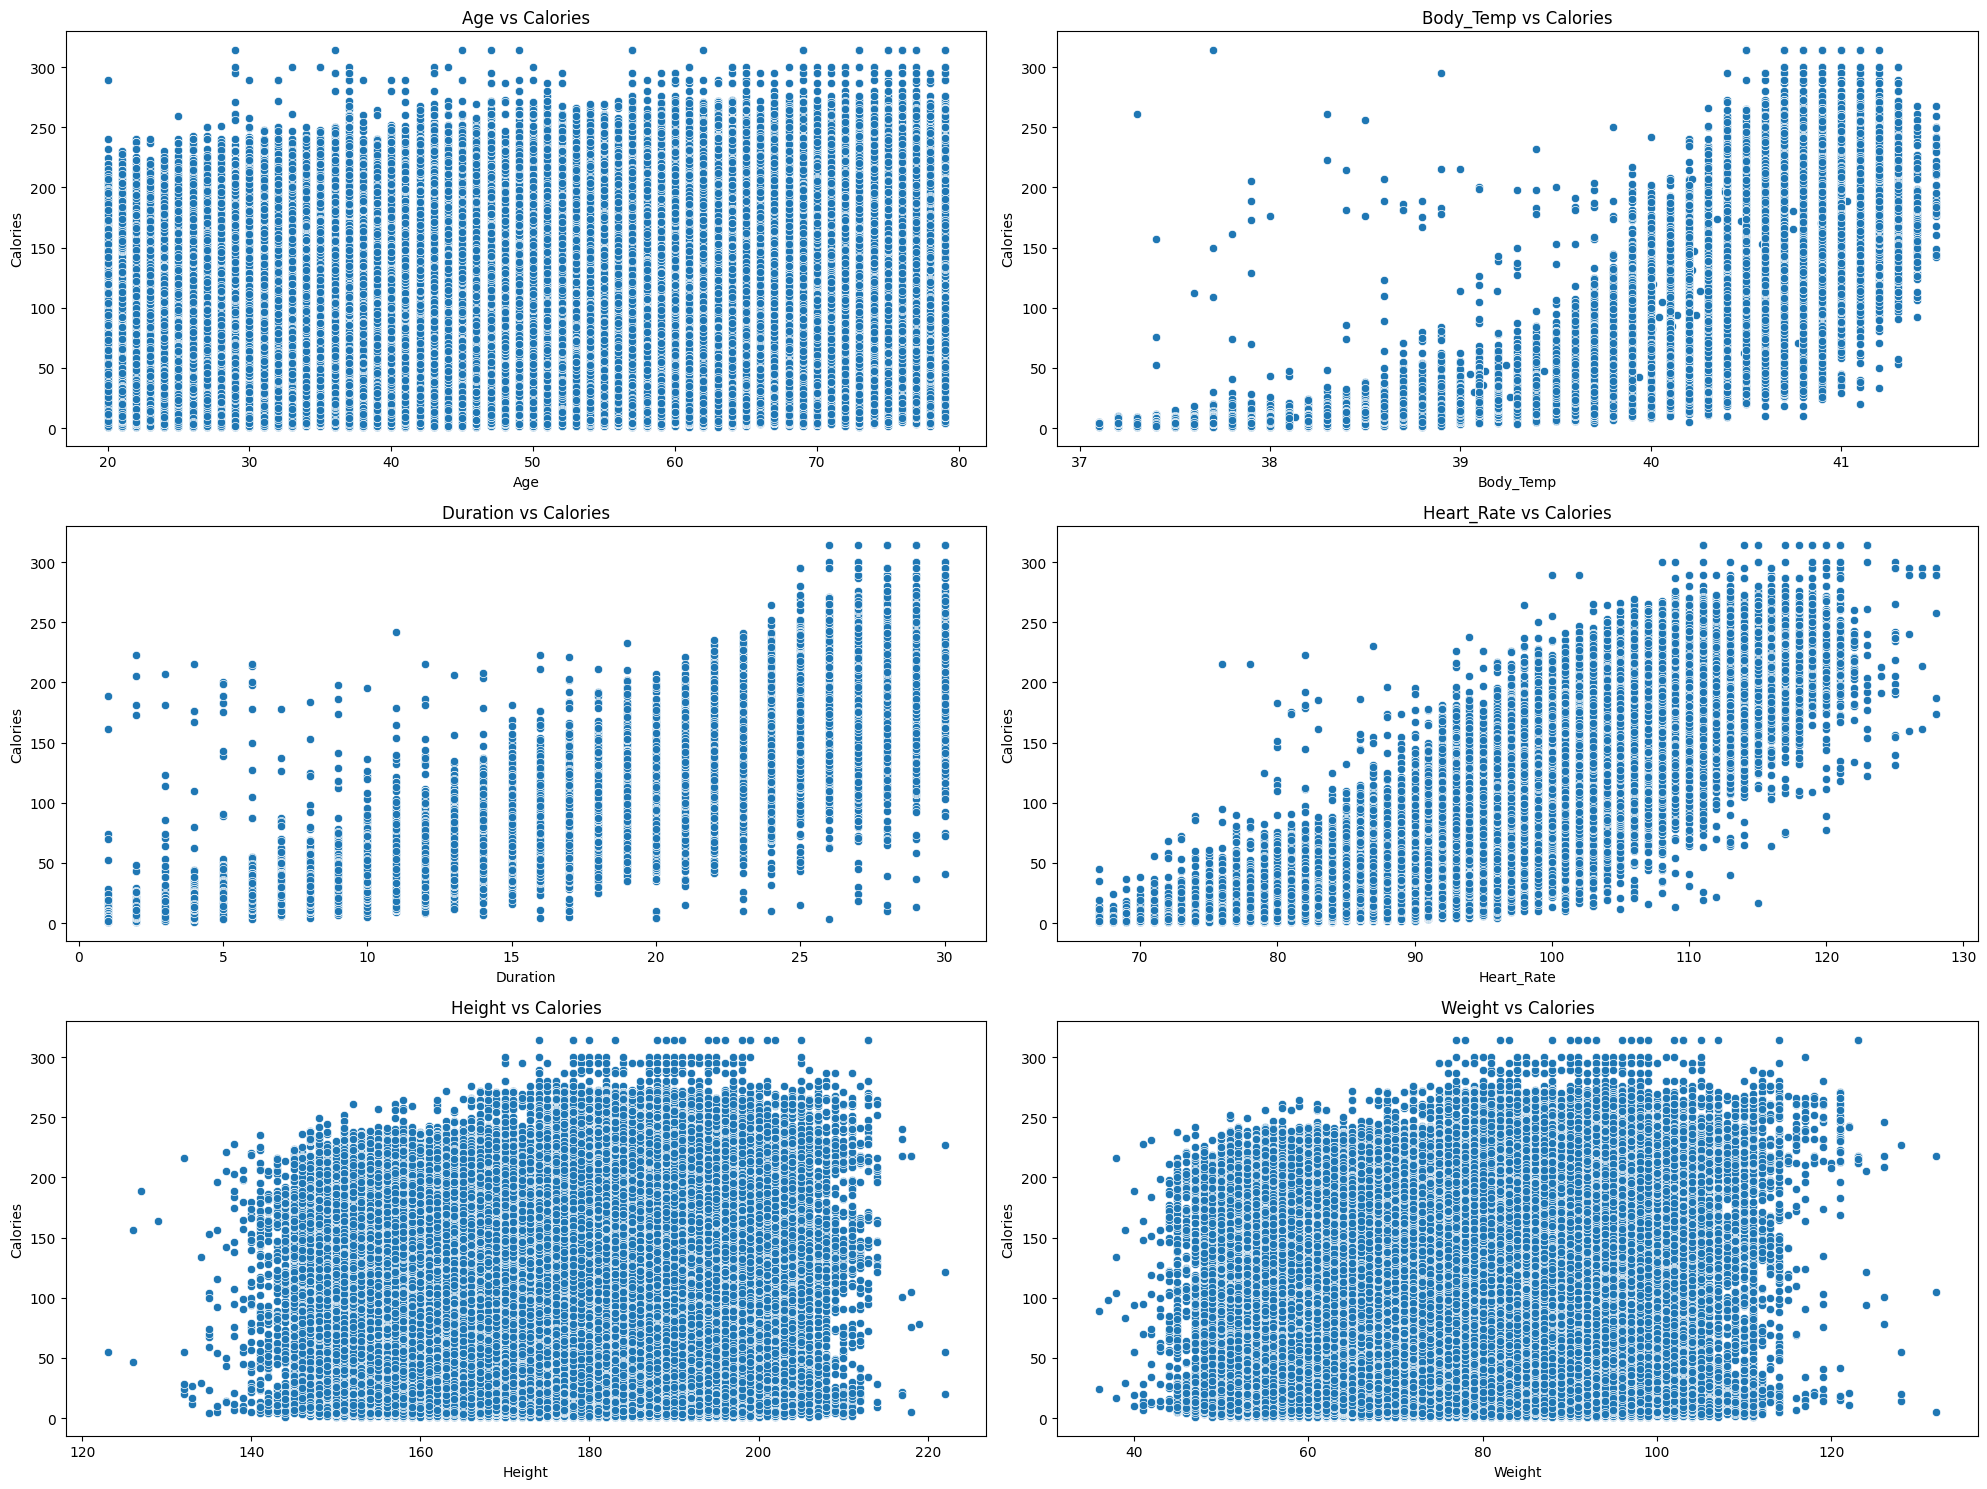

In [7]:
# Create subplots for scatter plots between each feature and Calories
fig, ax = plt.subplots(3, 2, figsize=(20, 15))
ax = ax.flatten()

# Plot scatter plots to observe relationships with the target
for i, col in enumerate(numeric_cols):
    sns.scatterplot(x=df_train[col], y=df_train['Calories'], ax=ax[i])
    ax[i].set_title(f'{col} vs Calories')

plt.tight_layout()
plt.show()

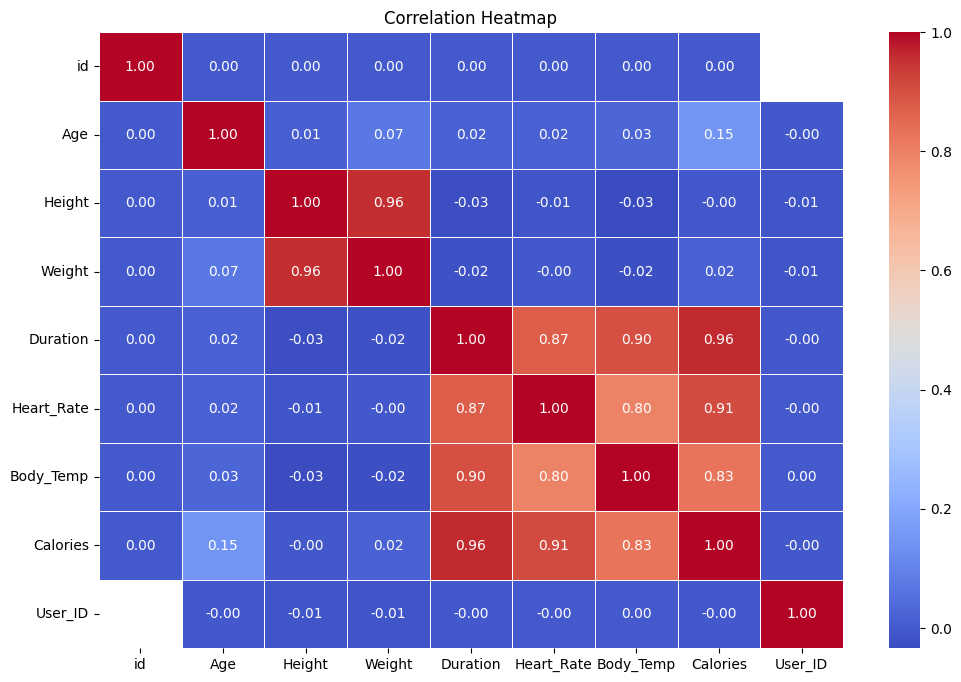

In [8]:
# Function to plot correlation heatmap for a given DataFrame
def plot_correlation_matrix(df):
    corr = df.corr()  # Compute correlation matrix
    fig, ax = plt.subplots(figsize=(12, 8))  # Set figure size
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f',
                linewidths=0.5, ax=ax)  # Plot heatmap with annotations
    ax.set_title('Correlation Heatmap')  # Add title
    plt.show()

# Call the function on the training data
plot_correlation_matrix(df_train)

### Feature–Target Relationships

To understand how each numeric feature relates to `Calories`, scatter plots were used.

- Features like 'Heart_Rate', 'Body_Temp', 'Duration' curved relationship with `Calories`.
- Others looked more scattered, with no obvious trend.
- A few had visible clusters or potential outliers.

After the scatter plots, a correlation heatmap was used to quantify these relationships. It helped confirm which variables were strongly related and which had minimal influence.

This visual and statistical insight guided later decisions in feature engineering—helping focus on features worth transforming and combining.